In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import missingno as msno
import platform
from matplotlib import font_manager, rc
import matplotlib as mpl
from datetime import datetime
import time
from tqdm import tqdm
import os

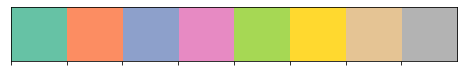

In [2]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

tqdm.pandas()

custom_palette = sns.color_palette("Set2")
sns.palplot(custom_palette)

In [3]:
path = './data/'
etf_info = pd.read_csv(path+'etf_info.csv', encoding='euc_kr')
etf_data = pd.read_csv(path+'etf_data.csv', encoding='euc_kr')
stock_data = pd.read_csv(path+'stock_data.csv', encoding='euc_kr')
pdf_monthly = pd.read_csv(path+'pdf_data_monthly.csv', encoding='euc_kr')
macro_data = pd.read_csv(path+'macro_data.csv', encoding='euc_kr')
stock_sector = pd.read_csv(path+'stock_sector_data.csv', encoding='euc_kr')

# Data Load

In [4]:
etf_info.head()

,코드,펀드명,분류,벤치마크명,설정일
0,A377990,TIGER Fn신재생에너지,4.국내-전략,FnGuide 신재생에너지 지수,2021-03-04
1,A376410,TIGER 탄소효율그린뉴딜,03.국내-전략,KRX/S&P 탄소효율그린뉴딜지수,2021-02-04
2,A364960,TIGER KRX BBIG K-뉴딜,03.국내-전략,KRX BBIG K-뉴딜,2020-10-06
3,A364980,TIGER KRX2차전지K-뉴딜,03.국내-전략,KRX 2차전지 K-뉴딜 지수,2020-10-06
4,A364970,TIGER KRX바이오K-뉴딜,03.국내-전략,KRX 바이오 K-뉴딜 지수,2020-10-06


In [5]:
etf_data.head()

,tdate,etf_code,data_name,value
0,2012-01-02,A091220,거래량,5114
1,2012-01-02,A091220,고가,7240
2,2012-01-02,A091220,시가,7240
3,2012-01-02,A091220,저가,7055
4,2012-01-02,A091220,종가,7110


In [6]:
stock_data.head()

,tdate,stock_code,data_name,value
0,2006-01-02,A006260,거래량,99233
1,2006-01-02,A009830,거래량,1143367
2,2006-01-02,A010060,거래량,77502
3,2006-01-02,A011930,거래량,727141
4,2006-01-02,A018000,거래량,957108


In [7]:
pdf_monthly.head()

,tdate,etf_code,stock_code,stock_name,ratio
0,2021-03-31,A377990,A006260,LS,0.091023
1,2021-03-31,A377990,A009830,한화솔루션,0.116892
2,2021-03-31,A377990,A010060,OCI,0.160506
3,2021-03-31,A377990,A011930,신성이엔지,0.045884
4,2021-03-31,A377990,A018000,유니슨,0.044053


In [8]:
macro_data.head()

,Item Name,"국내총생산(명목, 원화표시)(십억원)","국내총생산(명목, 달러표시)(억달러)","국민총소득(명목, 원화표시)(십억원)","국민총소득(명목, 달러표시)(억달러)",국내총소득(%),국민총소득(%),건설투자(%),설비투자(%),GDP 디플레이터(2015=100),...,한국(2015=100),미국(2015=100),일본(2015=100),영국(2015=100),독일(2015=100),한국(%),미국(%),일본(%).1,중국(%).1,영국(%).1
0,Frequency,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,M,M,M,M,M,Q,Q,Q,Q,Q
1,2000-01-12,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5
2,2000-01-13,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5
3,2000-01-14,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5
4,2000-01-15,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5


In [9]:
stock_sector.head()

,Unnamed: 0,A006260,A009830,A010060,A011930,A018000,A034020,A081000,A086390,A100090,...,A077360,A096640,A033170,A123260,A114810,A141000,A241770,A255440,A123860,A006350
0,2006-01-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
1,2006-02-28,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
2,2006-03-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
3,2006-04-30,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
4,2006-05-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행


# Data check

데이터별로 결측치와 통계치를 확인해보겠습니다.  

## etf_info

- 투자 대상 ETF 정보  
    - 파일 이름 : etf_info.csv
        - 현재 상장되어 운용중인 ETF의 기본정보

In [10]:
etf_info.columns

Index(['코드', '펀드명', '분류', '벤치마크명', '설정일'], dtype='object')

설정일 정보는 시간 데이터이므로 timestampe형식으로 변경해주겠습니다.

In [11]:
etf_info['설정일'] = etf_info['설정일'].progress_apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

100%|██████████| 127/127 [00:00<00:00, 39463.37it/s]


<Figure size 720x576 with 0 Axes>

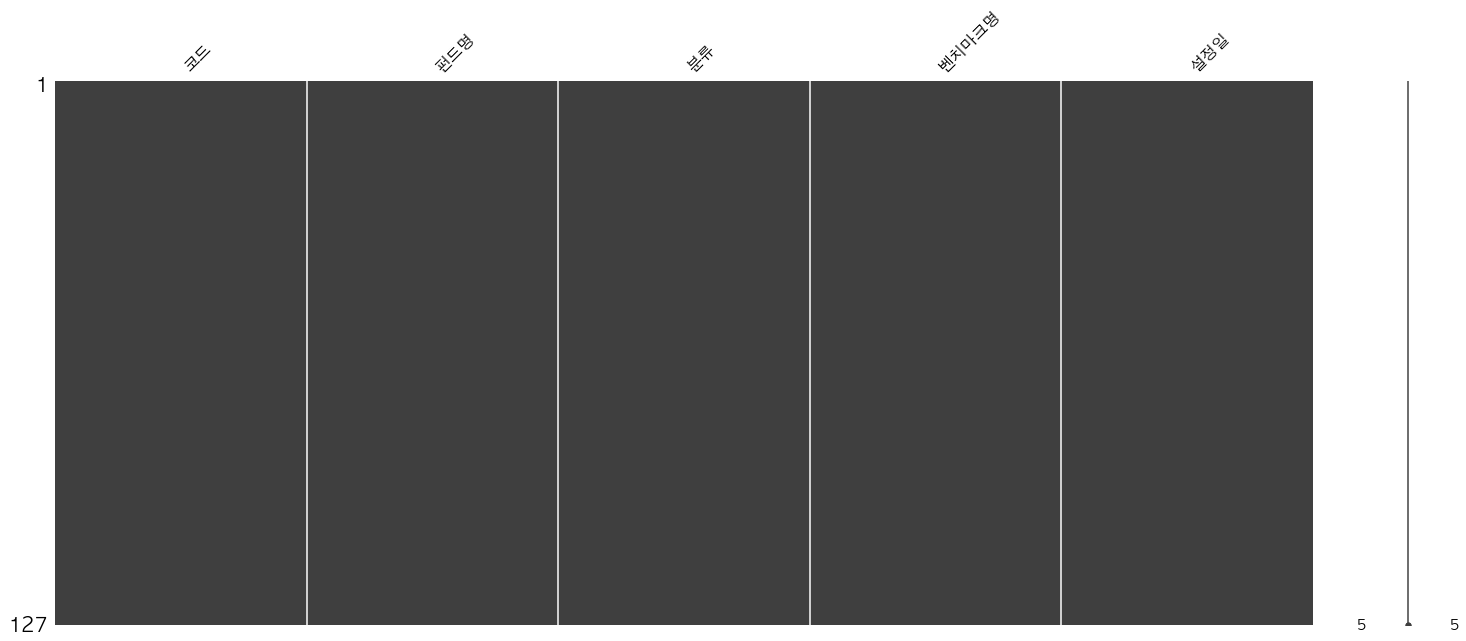

In [12]:
plt.figure(figsize=(10,8))

msno.matrix(etf_info)
plt.show()

In [13]:
etf_info.isna().sum()

코드       0
펀드명      0
분류       0
벤치마크명    0
설정일      0
dtype: int64

일단 ETF 정보에는 결측치는 존재하지 않는 것으로 보입니다.  
이번엔 각 데이터별 고유 정보의 수를 확인해보겠습니다.

In [14]:
funds = etf_info['펀드명'].unique()
codes = etf_info['코드'].unique()
fund_categories = etf_info['분류'].unique()
benchmarks = etf_info['벤치마크명'].unique()

print(f'전체 데이터의 수 : {etf_info.shape[0]}')
print(f'펀드의 종류 : {len(funds)}')
print(f'펀드 코드의 종류 : {len(codes)}')
print(f'펀드 카테고리의 수 : {len(fund_categories)}')
print(f'벤치마크 종류 수 : {len(benchmarks)}')

전체 데이터의 수 : 127
펀드의 종류 : 126
펀드 코드의 종류 : 126
펀드 카테고리의 수 : 17
벤치마크 종류 수 : 120


카테고리별로 데이터를 분류해보겠습니다.

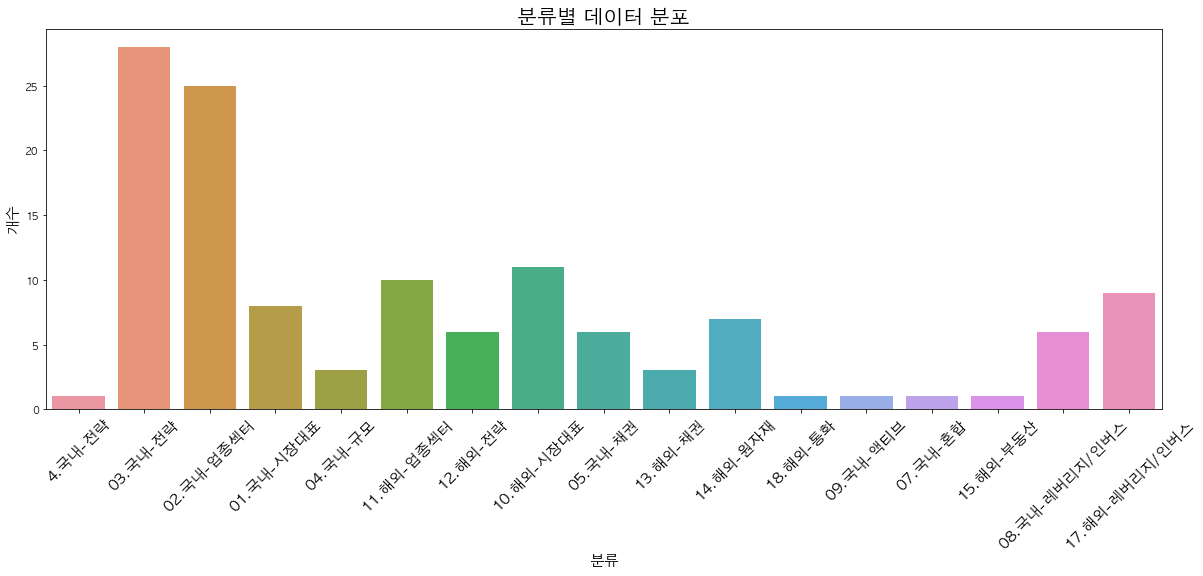

In [15]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(data=etf_info, x='분류', ax=ax)
plt.xlabel('분류', fontsize=15)
plt.ylabel('개수', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.title('분류별 데이터 분포', fontsize=20)
plt.show()

In [16]:
fund_categories

array(['4.국내-전략', '03.국내-전략', '02.국내-업종섹터', '01.국내-시장대표', '04.국내-규모',
       '11.해외-업종섹터', '12.해외-전략', '10.해외-시장대표', '05.국내-채권', '13.해외-채권',
       '14.해외-원자재', '18.해외-통화', '09.국내-액티브', '07.국내-혼합', '15.해외-부동산',
       '08.국내-레버리지/인버스', '17.해외-레버리지/인버스'], dtype=object)

## etf_data

- ETF 가격데이터
    - 파일 이름 : etf_data.csv
        - ETF의 일별 시가, 고가, 저가, 종가, 거래량 데이터

우선 날짜 정보를 timestamp 타입으로 변환하겠습니다.

In [17]:
etf_data.tdate = etf_data.tdate.progress_apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

100%|██████████| 830935/830935 [00:07<00:00, 114746.23it/s]


이제 etf_data의 결측치를 확인하겠습니다. 데이터프레임을 재정의해야하므로 결측치가 존재하는지 확인해야합니다.

<AxesSubplot:>

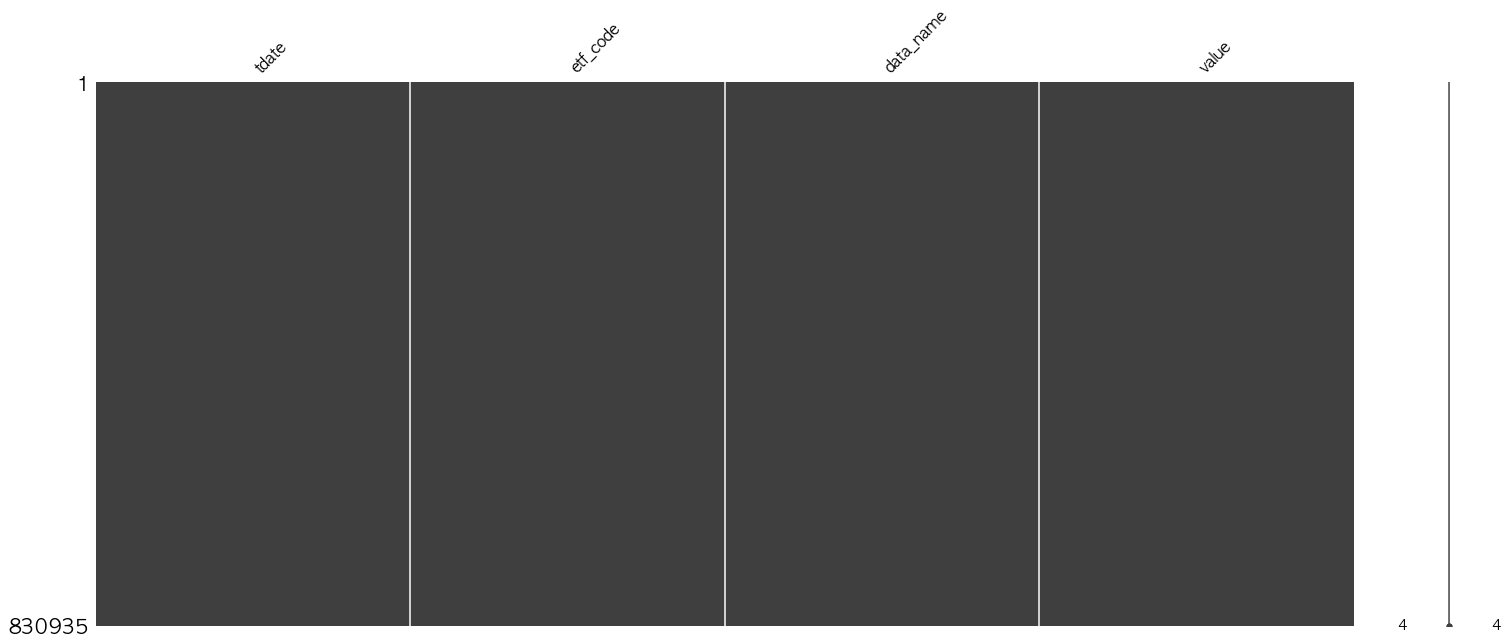

In [18]:
msno.matrix(etf_data)

In [19]:
etf_data.isna().sum()

tdate        0
etf_code     0
data_name    0
value        0
dtype: int64

결측치는 따로 존재하지 않는 것 같습니다.

etf_data는 데이터의 형태가 특이하기때문에 데이터프레임을 재정의할 필요가 있습니다.  
<img src='./img/etf_data.png' style='width:300px'/>

데이터프레임을 분석해보면 우선적으로 `tdate`를 기준으로 각 `etf_code`의 `data_name`을 컬럼으로 재정의 할 필요가 있습니다.

In [20]:
def get_etf_data(data):
    ret = pd.DataFrame()
    
    code = data['etf_code'].values[0]
    dates = data['tdate'].unique()
    
    ret['tdate'] = dates
    ret['etf_code'] = code
    ret['시가'] = data.loc[data.data_name == '시가'].value.values
    ret['저가'] = data.loc[data.data_name == '저가'].value.values
    ret['고가'] = data.loc[data.data_name == '고가'].value.values
    ret['종가'] = data.loc[data.data_name == '종가'].value.values
    ret['거래량'] = data.loc[data.data_name == '거래량'].value.values
    
    return ret

In [21]:
if 'etf_data_new.csv' in os.listdir(path):
    etf_data_new = pd.read_csv(path+'etf_data_new.csv')
else:
    etf_data_new = pd.DataFrame(columns=['tdate', 'etf_code', '시가', '저가', '고가', '종가', '거래량'])
    grouped = etf_data.groupby('etf_code', as_index=False)

    for name, item in tqdm(grouped):
        tmp = get_etf_data(item)

        etf_data_new = etf_data_new.append(tmp, ignore_index=True)

    etf_data_new[['시가', '종가', '저가', '고가', '거래량']] = etf_data_new[['시가', '종가', '저가', '고가', '거래량']].apply(pd.to_numeric)
    etf_data_new.to_csv(path+'etf_data_new.csv', index=False)

In [22]:
etf_data_new.head()

,tdate,etf_code,시가,저가,고가,종가,거래량
0,2012-01-02,A091220,7240,7055,7240,7110,5114
1,2012-01-03,A091220,7180,7180,7365,7365,1979
2,2012-01-04,A091220,7370,7220,7370,7220,79
3,2012-01-05,A091220,7220,7150,7220,7150,359
4,2012-01-06,A091220,7145,7055,7165,7055,89


이제 데이터프레임을 전처리와 분석에 편리한 형태로 재정의 하였습니다.  
후에 데이터 관리의 편의를 위해 따로 저장을 해두겠습니다.  

우선 etf_code별로 가격들과 거래지표를 표시했습니다. 이제 주요 통계지표를 확인해보겠습니다.

In [23]:
etf_data_new.describe()

,시가,저가,고가,종가,거래량
count,166187.000000,166187.000000,166187.000000,166187.000000,1.661870e+05
mean,15478.194805,15391.230511,15549.302683,15473.084327,1.504745e+05
std,17497.760756,17482.999824,17514.159896,17499.689976,7.577560e+05
min,1215.000000,1185.000000,1260.000000,1185.000000,0.000000e+00
25%,7855.000000,7800.000000,7905.000000,7850.000000,4.230000e+02
50%,10930.000000,10855.000000,10990.000000,10925.000000,4.132000e+03
75%,15215.000000,15095.000000,15305.000000,15200.000000,3.895450e+04
max,120000.000000,112125.000000,131255.000000,131255.000000,9.648249e+07


## stock_data

- ETF 보유내역에 존재하는 종목의 가격데이터
    - 파일 이름 : stock_data.csv
        - 종목들의 일별 시가, 고가, 저가, 종가, 거래량, 시가총액, 거래정지 구분 데이터  

etf_data와 마찬가지로 `tdate`변수를 timestamp로 변경해주고 데이터프레임을 재정의해야합니다.  
똑같은 과정을 거치겠습니다.

In [24]:
stock_data.tdate = stock_data.tdate.progress_apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

100%|██████████| 27819602/27819602 [04:06<00:00, 112929.51it/s]


In [25]:
stock_data.isna().sum()

tdate         0
stock_code    0
data_name     0
value         0
dtype: int64

In [26]:
stock_data.columns

Index(['tdate', 'stock_code', 'data_name', 'value'], dtype='object')

In [27]:
stock_data.data_name.unique()

array(['거래량', '거래정지여부(1:정지, 0:정상)', '고가', '시가', '시가총액', '저가', '종가'],
      dtype=object)

In [139]:
if 'stock_data_new.csv' in os.listdir(path):
    stock_data_new = pd.read_csv(path+'stock_data_new.csv')
else:
    piv = stock_data.pivot_table(index=['tdate', 'stock_code'], columns=['data_name'])
    piv = piv.reset_index()
    piv = piv.drop(['index'], axis=1)
    piv.columns = ['tdate', 'stock_code', '거래량', '거래정지여부(1:정지, 0:정상)', '고가', '시가', '시가총액', '저가', '종가']
    stock_data_new = piv
    
    stock_data_new.to_csv(path+'stock_data_new.csv', index=False)

## stock_sector

- ETF 보유내역에 존재하는 종목의 가격데이터
    - 파일 이름 : stock_sector_data.csv
        - 종목들의 월별 업종 역사적 데이터  

In [140]:
stock_sector = stock_sector.rename{}

,Unnamed: 0,A006260,A009830,A010060,A011930,A018000,A034020,A081000,A086390,A100090,...,A077360,A096640,A033170,A123260,A114810,A141000,A241770,A255440,A123860,A006350
0,2006-01-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
1,2006-02-28,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
2,2006-03-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
3,2006-04-30,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
4,2006-05-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2021-01-31,코스피 금융업,코스피 화학,코스피 화학,"코스피 전기,전자",코스닥 제조,코스피 기계,코스피 화학,코스닥 IT H/W,코스닥 제조,...,코스닥 제조,코스닥 IT H/W,코스닥 IT H/W,NaN,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,NaN
181,2021-02-28,코스피 금융업,코스피 화학,코스피 화학,"코스피 전기,전자",코스닥 제조,코스피 기계,코스피 화학,코스닥 IT H/W,코스닥 제조,...,코스닥 제조,코스닥 IT H/W,코스닥 IT H/W,NaN,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,NaN
182,2021-03-31,코스피 금융업,코스피 화학,코스피 화학,"코스피 전기,전자",코스닥 제조,코스피 기계,코스피 화학,코스닥 IT H/W,코스닥 제조,...,코스닥 제조,코스닥 IT H/W,코스닥 IT H/W,NaN,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,NaN
183,2021-04-30,코스피 금융업,코스피 화학,코스피 화학,"코스피 전기,전자",코스닥 제조,코스피 기계,코스피 화학,코스닥 IT H/W,코스닥 제조,...,코스닥 제조,코스닥 IT H/W,코스닥 IT H/W,NaN,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,코스닥 IT H/W,NaN
